In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
dataset.isnull().any().any()

False

In [ ]:
Remove outliers after label encoding.

In [4]:
x=dataset.iloc[:,3:13].values
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [5]:
y=dataset.iloc[:,-1].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
Column transformer accepts 2D arrays and label encoder accepts only 1D arrays

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [7]:
ct=ColumnTransformer([("on",OneHotEncoder(),[1])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
x=x[:,1:]
x

array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

In [10]:
x.shape

(10000, 11)

In [11]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x[:,3]=lb.fit_transform(x[:,3])
x

array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

In [12]:
x[0]

array([0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [13]:
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.57873591, -0.57380915, -0.32622142, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.57873591,  1.74273971, -0.44003595, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.57873591, -0.57380915, -1.53679418, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-0.57873591, -0.57380915,  0.60498839, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.72790383, -0.57380915,  1.25683526, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.57873591, -0.57380915,  1.46377078, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train.shape

(8000, 11)

In [17]:
x_train.ndim

2

# Neural Network Starts

In [ ]:
Step 1:Initializing the model

In [25]:
from tensorflow.keras.models import Sequential #Used to initialize the model
from tensorflow.keras.layers import Dense #Used to build layers

In [26]:
model=Sequential() #creating an object from sequential

In [ ]:
11 inputs #how many inputs, 2 layers formed

In [27]:
#hidden layer 1
model.add(Dense(input_dim=11,kernel_initializer='random_uniform',units=15,activation='relu')) #how many inputs, how many neurons, activation function

In [29]:
#hidden layer 2
model.add(Dense(units=9,kernel_initializer='random_uniform',activation='relu'))

In [30]:
#output layer
model.add(Dense(units=1,kernel_initializer='random_uniform',activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 144       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 334
Trainable params: 334
Non-trainable params: 0
_________________________________________________________________


In [32]:
#compiling the layers, stochastic batch gradient
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])
#if stochastic, use sgd
#if categorical,use categorical_crossentropy
#for regression, metrics=['mse']

In [33]:
model.fit(x_train,y_train,epochs=100,batch_size=32) #batch size is in the power of 2

Epoch 1/100
250/250 [==============================] - 0s 790us/step - loss: 0.5450 - accuracy: 0.7941
Epoch 2/100
250/250 [==============================] - 0s 754us/step - loss: 0.4330 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 762us/step - loss: 0.4263 - accuracy: 0.7961
Epoch 4/100
250/250 [==============================] - 0s 718us/step - loss: 0.4193 - accuracy: 0.8190
Epoch 5/100
250/250 [==============================] - 0s 705us/step - loss: 0.4132 - accuracy: 0.8298
Epoch 6/100
250/250 [==============================] - 0s 649us/step - loss: 0.4091 - accuracy: 0.8326
Epoch 7/100
250/250 [==============================] - 0s 682us/step - loss: 0.4056 - accuracy: 0.8346
Epoch 8/100
250/250 [==============================] - 0s 646us/step - loss: 0.4031 - accuracy: 0.8364
Epoch 9/100
250/250 [==============================] - 0s 678us/step - loss: 0.4012 - accuracy: 0.8374
Epoch 10/100
250/250 [==============================] - 0s 598us/step - l

250/250 [==============================] - 0s 634us/step - loss: 0.3272 - accuracy: 0.8651
Epoch 80/100
250/250 [==============================] - 0s 626us/step - loss: 0.3290 - accuracy: 0.8633
Epoch 81/100
250/250 [==============================] - 0s 638us/step - loss: 0.3284 - accuracy: 0.8662
Epoch 82/100
250/250 [==============================] - 0s 625us/step - loss: 0.3275 - accuracy: 0.8655
Epoch 83/100
250/250 [==============================] - 0s 535us/step - loss: 0.3285 - accuracy: 0.8652
Epoch 84/100
250/250 [==============================] - 0s 650us/step - loss: 0.3289 - accuracy: 0.8635
Epoch 85/100
250/250 [==============================] - 0s 602us/step - loss: 0.3282 - accuracy: 0.8633
Epoch 86/100
250/250 [==============================] - 0s 590us/step - loss: 0.3273 - accuracy: 0.8621
Epoch 87/100
250/250 [==============================] - 0s 606us/step - loss: 0.3275 - accuracy: 0.8666
Epoch 88/100
250/250 [==============================] - 0s 598us/step - loss:

In [35]:
y_pred=model.predict(x_test)
y_pred

array([[0.29746974],
       [0.32455498],
       [0.2034863 ],
       ...,
       [0.11527732],
       [0.25851315],
       [0.22232157]], dtype=float32)

In [37]:
y_pred=(y_pred>=0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1483,  112],
       [ 169,  236]], dtype=int64)

In [39]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.7562483068230195

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8595

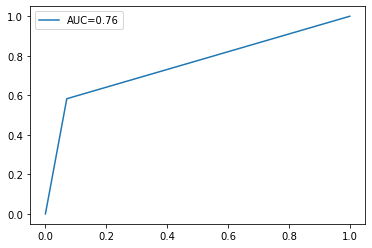

In [41]:
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend()
plt.show()

In [42]:
#epoch is for forward and backward propagation